# Data Loading

In [52]:
# Importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Define path to raw data files
current_dir = os.getcwd()
data_path = os.path.abspath(os.path.join(current_dir, "..", "data", "raw"))

In [54]:
# files in the data directory
files = os.listdir(data_path)

In [55]:
# Create a dictionary where each key is a file name and the value is a DataFrame with the data.
custom_names = {
    "olist_customers_dataset.csv": "customer",
    "olist_geolocation_dataset.csv": "geolocation",
    "olist_order_items_dataset.csv": "order_items",
    "olist_order_payments_dataset.csv": "payments",
    "olist_orders_dataset.csv": "orders",
    "olist_products_dataset.csv": "products",
    "olist_sellers_dataset.csv": "sellers"
}

dfs = {
    custom_names[file]: pd.read_csv(os.path.join(data_path, file))
    for file in files if file in custom_names
}

# Data Cleaning and preprocessing

## Orders Dataframe: treatment and Type Conversion

In [56]:
orders = dfs["orders"]  # Extract the 'orders' DataFrame

#### Null and Missing values treatment

In [57]:
# Identifying null or missing values.
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


There are null numerical values in the order approval date column, indicating that the orders were not approved. The shipping date column also contains null values, indicating that the order was not shipped. Lastly, the delivery date column also contains null values, indicating that the order was not delivered. However, the data will be kept as is, since the column type will be changed to datetime and the null values will become NaT (Not a Time). This maintains data consistency and avoids issues with operations involving dates.

In [58]:
# Checking column data types
print(orders.dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


#### Columns type conversion


Converting date columns from object to datetime

In [59]:

date_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

In [60]:
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors="coerce")

Converting "order status" column from object to category

In [61]:
orders["order_status"] = orders["order_status"].astype("category")

## Orders Items Dataframe: treatment and Type Conversion

In [62]:
order_items = dfs["order_items"]  # Extract the 'order_items' DataFrame

#### Null and Missing values treatment

In [63]:
# Identifying null or missing values.
print(order_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [64]:
# Checking column data types
print(order_items.dtypes)

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


Converting date columns from object to datetime

In [65]:
order_items["shipping_limit_date"] = pd.to_datetime(
    order_items["shipping_limit_date"], errors="coerce")

## Customers Dataframe: treatment and Type Conversion

In [66]:
customer = dfs["customer"]  # Extract the 'customers' DataFrame

#### Null and Missing values treatment

In [67]:
# Identifying null or missing values.
print(customer.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [68]:
# Checking column data types
print(customer.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


The column data types are correct.

## Products Dataframe: treatment and Type Conversion

In [69]:
products = dfs["products"]  # Extract the 'products' DataFrame

#### Null and Missing values treatment

In [70]:
# Identifying null or missing values.
print(products.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Null values were found in the product category name, which will be filled with "Unknown". Null values were also found in the columns: product name length, description length, and number of photos. These will be filled with the median to avoid distortions caused by extreme values. Finally, two null values were found in the columns: weight, length, height, and width. All of these will also be filled with the median.

In [71]:
# Null and missing values treatment.
products["product_category_name"].fillna("Unknown", inplace=True)
num_cols = [
    "product_name_lenght", "product_description_lenght",
    "product_photos_qty", "product_weight_g", "product_length_cm",
    "product_height_cm", "product_width_cm"
]
for col in num_cols:
    products[col].fillna(products[col].median(), inplace=True)

#### Columns type conversion

In [72]:
# Checking column data types
print(customer.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


The column data types are correct.

## Sellers Dataframe: treatment and Type Conversion

In [73]:
sellers = dfs["sellers"]  # Extract the 'sellers' DataFrame

#### Null and Missing values treatment

In [74]:
# Identifying null or missing values.
print(sellers.isnull().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [75]:
# Checking column data types
print(sellers.dtypes)

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object


The column data types are correct.

## Payments Dataframe: treatment and Type Conversion

In [76]:
payments = dfs["payments"]  # Extract the 'payments' DataFrame

#### Null and Missing values treatment

In [77]:
# Identifying null or missing values.
print(payments.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [78]:
# Checking column data types
print(payments.dtypes)

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


Converting 'payment_type' column from object to category.

In [79]:
payments["payment_type"] = payments["payment_type"].astype("category")

## Geolocation: treatment and Type Conversion

In [80]:
geolocation = dfs["geolocation"]  # Extract the 'geolocation' DataFrame

#### Null and Missing values treatment

In [81]:
# Identifying null or missing values.
print(geolocation.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


There are no null or missing values in the dataframe.

#### Columns type conversion

In [82]:
# Checking column data types
print(geolocation.dtypes)

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


The column data types are correct.

## Pré processing - Checking data consistency

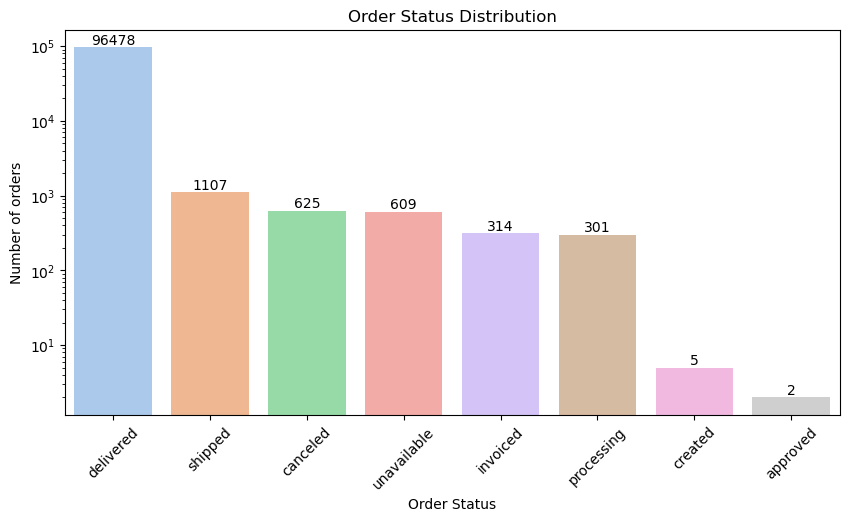

In [83]:
# Orders counts by status

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=orders, x ="order_status", order=orders["order_status"].value_counts().index, palette="pastel")
plt.xticks(rotation=45)
plt.yscale("log")
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Number of orders")
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black"
    )
plt.show()



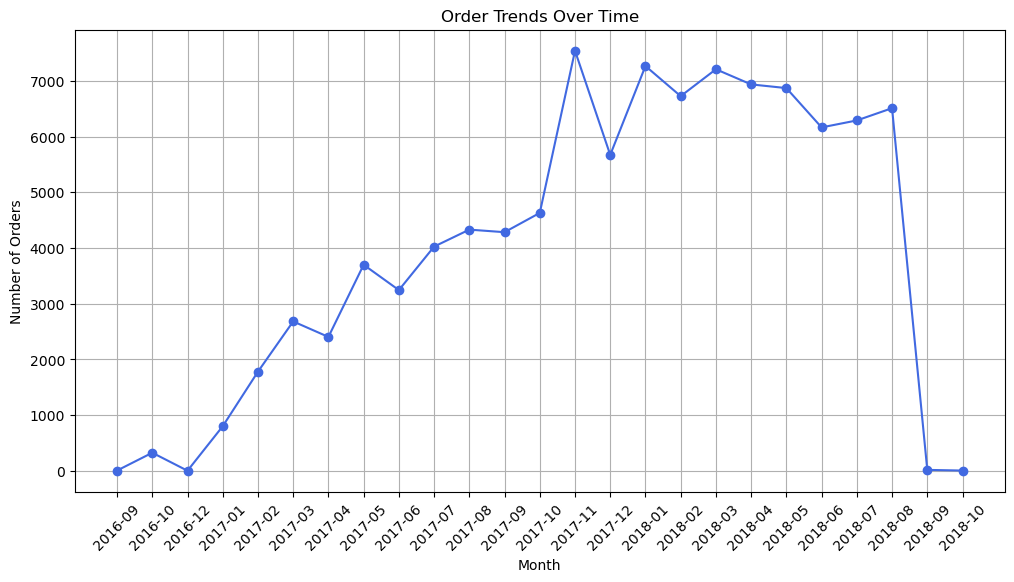

In [84]:
# Orders over time

orders["order_purchase_month"] = orders["order_purchase_timestamp"].dt.to_period(
    "M")
monthly_orders = orders.groupby("order_purchase_month")["order_id"].count()
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(
    str), monthly_orders.values, marker='o', linestyle="-", color="royalblue")
plt.title("Order Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

There was a growth trend in the number of orders from December 2016 to November 2017, 
followed by a stabilization period from December 2017 to August 2018. However, there was 
a sharp drop in orders from August to October. It's important to check whether there is 
data available for the final months or if the dataset simply ends there.

In [85]:
# Checking if data exists for the last months
print(monthly_orders.tail(30))  # Last 10 months available

order_purchase_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64


There were orders in the last months, but the quantity is well below normal, indicating that the dataset is likely incomplete for the final months.

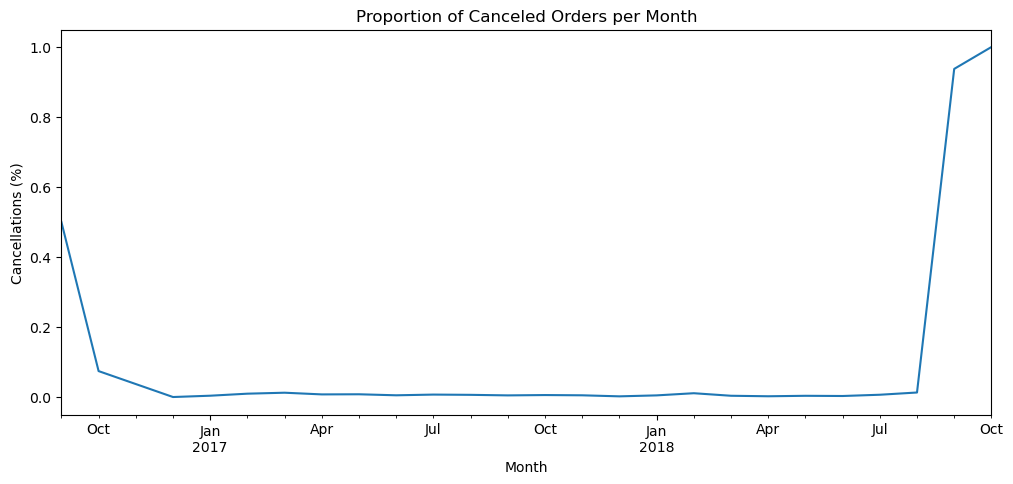

In [86]:
# Checking order cancellations over time

orders.groupby("order_purchase_month")["order_status"].value_counts(normalize=True).unstack()["canceled"].plot(
    kind="line", figsize=(12, 5))
plt.title("Proportion of Canceled Orders per Month")
plt.xlabel("Month")
plt.ylabel("Cancellations (%)")
plt.show()

The graph shows that the proportion of canceled orders rose to around 100% in the last few months.

### Data Note

The charts indicate that there is a normal pattern in the data, except for the months with less than 100 orders, like: 2016-09, 2016-12, 2018-09 and 2018-10. The likely reason is that the data is incomplete. Therefore, the chosen approach to prevent this discrepancy in order volume from affecting further analyses and models will be remove the rows related to those months.

#### REMOVING ROWS RELATED TO MONTHS WITH DATA DISCREPANCIES

In [87]:
def olist_filter_and_save(
    orders, order_items, payments, customer, products, sellers
):
    # Orders purchase count by month
    order_counts = orders['order_purchase_month'].value_counts()
    valid_months = order_counts[order_counts >= 100].index

    # Filtering the orders by valid months.
    orders_filtered = orders[orders['order_purchase_month'].isin(valid_months)]

    # Valid IDs
    valid_order_ids = orders_filtered['order_id']
    valid_customer_ids = orders_filtered['customer_id']

    # Filtering other dataframes based on valid data
    order_items_filtered = order_items[order_items['order_id'].isin(valid_order_ids)]
    payments_filtered = payments[payments['order_id'].isin(valid_order_ids)]
    customer_filtered = customer[customer['customer_id'].isin(valid_customer_ids)]
    products_filtered = products[products['product_id'].isin(order_items_filtered['product_id'])]
    sellers_filtered = sellers[sellers['seller_id'].isin(order_items_filtered['seller_id'])]

    # Dictionary with filtered DataFrames
    dfs = {
        "orders": orders_filtered,
        "order_items": order_items_filtered,
        "payments": payments_filtered,
        "customer": customer_filtered,
        "products": products_filtered,
        "sellers": sellers_filtered,
    }

    # Relative path to save files
    current_dir = os.getcwd()
    processed_path = os.path.abspath(os.path.join(current_dir, "..", "data", "processed"))

    # Save DataFrames to CSV files
    for file_name, df in dfs.items():
        file_path = os.path.join(processed_path, f"{file_name}.csv")
        df.to_csv(file_path, index=False)

    return dfs

In [88]:
# Call the function to apply the filter and save the files
dfs_filtered = olist_filter_and_save(orders, order_items, payments, customer, products, sellers)


In [89]:
#Accessing the filtered DataFrames from the 'dfs_filtered' dictionary
orders_filtered = dfs_filtered['orders'].copy()
order_items_filtered = dfs_filtered['order_items'].copy()
payments_filtered = dfs_filtered['payments'].copy()
customer_filtered = dfs_filtered['customer'].copy()
products_filtered = dfs_filtered['products'].copy()
sellers_filtered = dfs_filtered['sellers'].copy()

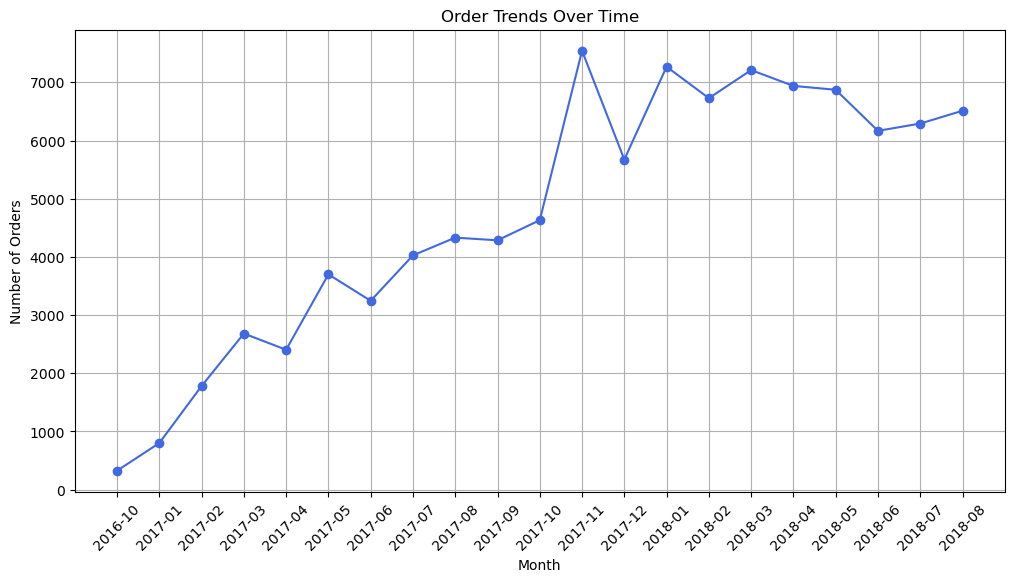

In [90]:
orders_filtered["order_purchase_month"] = orders_filtered["order_purchase_timestamp"].dt.to_period(
    "M")
monthly_orders = orders_filtered.groupby("order_purchase_month")["order_id"].count()
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(
    str), monthly_orders.values, marker='o', linestyle="-", color="royalblue")
plt.title("Order Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Feature Engineering


In this project, I will perform an in-depth data analysis on a Brazilian marketplace dataset to predict whether an order will be delivered late or not.
I will start by integrating relevant datasets and creating new features that may influence delivery delays.



Creating new variables from the existing data

In [91]:
# Was it delivered late?
# Binary feature (0 = on time or early, 1 = late)
orders_filtered["is_late"] = (
    orders_filtered["order_delivered_customer_date"] > orders_filtered["order_estimated_delivery_date"]
).astype(int)

In [92]:
# Merging the datasets
df_merged = orders_filtered.merge(order_items_filtered, on='order_id', how='left')
df_merged  = df_merged.merge(customer_filtered, on='customer_id', how='left')
df_merged  = df_merged.merge(products_filtered, on='product_id', how='left')
df_merged  = df_merged.merge(payments_filtered, on='order_id', how='left')
df_merged  = df_merged.merge(sellers_filtered, on='seller_id', how='left')

# Exploratory Data Analysis

The focus of this analysis is to explore and analyze the delivery delays of orders in a Brazilian e-commerce marketplace. We will identify patterns related to late deliveries, look for factors that could influence delays.

### Late Deliveries

#### Late Deliveries Over time

In [93]:
# calculate monthly late delivery rate
late_by_month = df_merged.groupby("order_purchase_month")["is_late"].mean()
# Transform Series to DataFrame
late_by_month = late_by_month.reset_index()
late_by_month.rename(columns={"is_late": "late_rate"}, inplace=True)
# calculate monthly total mean
late_by_month_total_mean = df_merged["is_late"].mean()

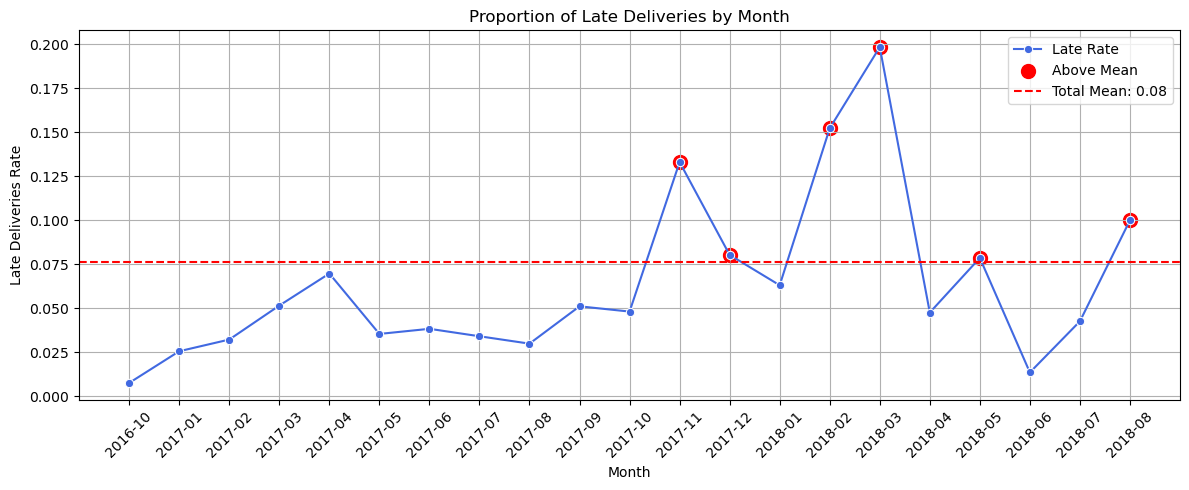

In [94]:
# Convert Period to string to enable proper plotting
late_by_month['order_purchase_month'] = late_by_month['order_purchase_month'].astype(str)

# Create a new column to identify months above the overall mean
late_by_month['above_mean'] = late_by_month['late_rate'] > late_by_month_total_mean

# Plot
plt.figure(figsize=(12, 5))

# Line plot for late delivery rate
sns.lineplot(x='order_purchase_month', y='late_rate', data=late_by_month, marker='o', color='royalblue', label='Late Rate')

# Highlight points above the overall mean
above = late_by_month[late_by_month['above_mean']]
plt.scatter(above['order_purchase_month'], above['late_rate'], color='red', s=100, label='Above Mean')

# Horizontal line for the overall mean late rate
plt.axhline(y=late_by_month_total_mean, color='red', linestyle='--', label=f'Total Mean: {late_by_month_total_mean:.2f}')

# Chart formatting
plt.title("Proportion of Late Deliveries by Month")
plt.xlabel("Month")
plt.ylabel("Late Deliveries Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


This chart shows the proportion of late deliveries by purchase month. The red line represents the overall average, helping identify trends or periods with unusually high delays.

### Delivery Delays by Customer Location
Understanding where delays are most frequent can provide crucial insights into regional logistical issues. The following analysis identifies the Brazilian region and states with the highest proportion of delivery delays, considering the customer's location.

#### Delivery Delays by Customer Region

In [95]:
# Create a dictionary where the key is the region and the value is a list of states.
region = {
    "sudeste": ["SP", "RJ", "ES", "MG"], 
    "sul": ["RS", "SC", "PR"],
    "centro_oeste": ["DF", "GO", "MT", "MS"],
    "nordeste": ["BA", "PE", "CE", "RN", "PB", "AL", "SE", "PI", "MA"],
    "norte": ["AM", "PA", "RO", "RR", "AP", "AC", "TO"]
}

# Create a new dictionary using dictionary comprehension, where the key is the state and the value is the region.
state_to_region = {state: region_name for region_name, states in region.items() for state in states}

# Create a new column by mapping each state to its corresponding region.
df_merged["customer_region"] = df_merged["customer_state"].map(state_to_region).fillna("unknown")



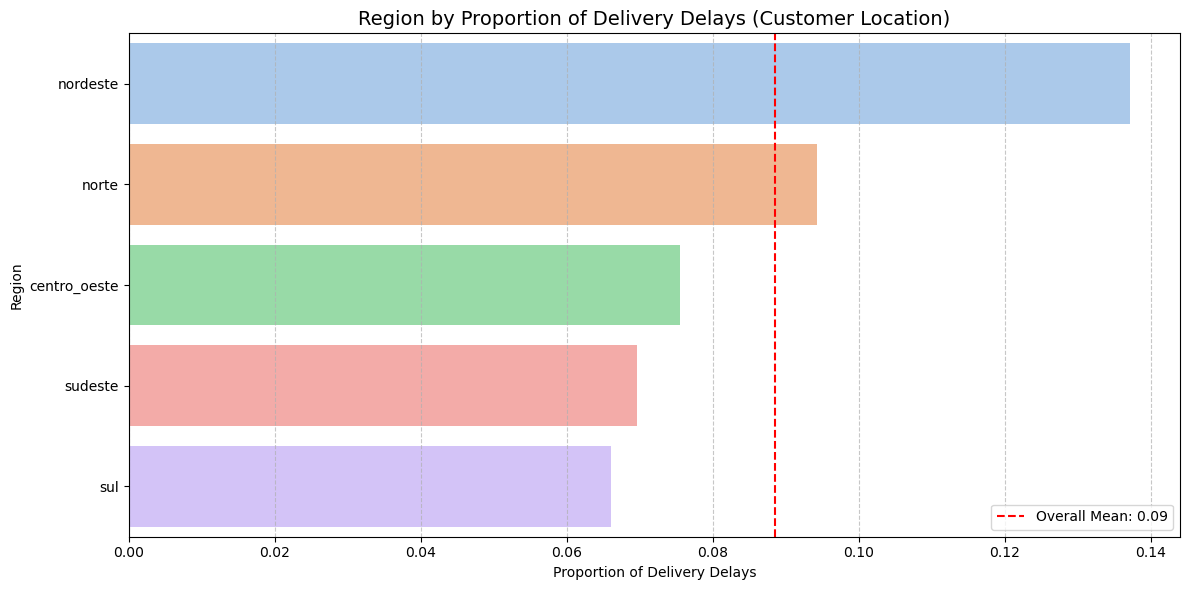

In [96]:
# Filter only delayed orders (calculate the mean delay rate per region)
delayed_orders_region = df_merged.groupby("customer_region")["is_late"].mean()

# Sort and select the region with the highest delay proportions.
top_region = delayed_orders_region.sort_values(ascending=False)

# Reset index to turn it into a DataFrame
top_region = top_region.reset_index()
top_region.rename(columns={"is_late": "delayed_orders_region"}, inplace=True)

# Calculate the overall average delay rate
overall_mean_delay = delayed_orders_region.mean()

# Plot delay percentage by customer region
plt.figure(figsize=(12,6))
sns.barplot(x='delayed_orders_region', y='customer_region', data = top_region, palette='pastel')

# Add a vertical line for the overall mean
plt.axvline(x=overall_mean_delay, color='red', linestyle='--', label=f'Overall Mean: {overall_mean_delay:.2f}')

# Plot settings
plt.title('Region by Proportion of Delivery Delays (Customer Location)', fontsize=14)
plt.xlabel('Proportion of Delivery Delays')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

#### Delivery Delays by Customer State

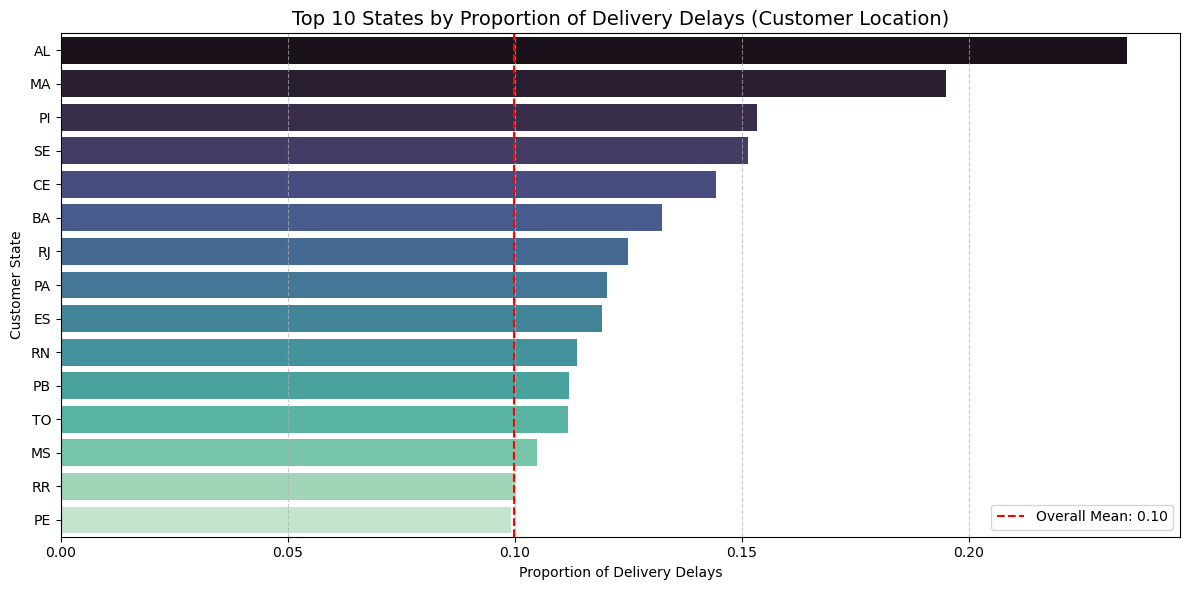

In [97]:
# Filter only delayed orders (calculating the mean delay rate per state)
delayed_orders = df_merged.groupby("customer_state")["is_late"].mean()

# Sort and select the top 15 states with the highest delay proportions 
top_states = delayed_orders.sort_values(ascending=False).head(15)

# Reset index to turn it into a DataFrame
top_states = top_states.reset_index()
top_states.rename(columns={"is_late": "delayed_orders"}, inplace=True)

# Calculate the overall average delay rate
overall_mean_delay = delayed_orders.mean()

# Plot delay percentage by customer state
plt.figure(figsize=(12, 6))
sns.barplot(x='delayed_orders', y='customer_state', data=top_states, palette='mako')

# Add a vertical line for the overall mean
plt.axvline(x=overall_mean_delay, color='red', linestyle='--', label=f'Overall Mean: {overall_mean_delay:.2f}')

# Plot settings
plt.title('Top 10 States by Proportion of Delivery Delays (Customer Location)', fontsize=14)
plt.xlabel('Proportion of Delivery Delays')
plt.ylabel('Customer State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


### Delivery Delays by Seller Location
Understanding where delays are most frequent can provide crucial insights into regional logistical issues. The following analysis identifies the Brazilian region and states with the highest proportion of delivery delays, considering the seller's location.

#### Delivery Delays by Seller Region

In [105]:
# Create a dictionary where the key is the region and the value is a list of states.
region = {
    "sudeste": ["SP", "RJ", "ES", "MG"], 
    "sul": ["RS", "SC", "PR"],
    "centro_oeste": ["DF", "GO", "MT", "MS"],
    "nordeste": ["BA", "PE", "CE", "RN", "PB", "AL", "SE", "PI", "MA"],
    "norte": ["AM", "PA", "RO", "RR", "AP", "AC", "TO"]
}

# Create a new dictionary using dictionary comprehension, where the key is the state and the value is the region.
state_to_region = {state: region_name for region_name, states in region.items() for state in states}

# Create a new column by mapping each state to its corresponding region.
df_merged["seller_region"] = df_merged["seller_state"].map(state_to_region).fillna("unknown")

0.06730184757576538


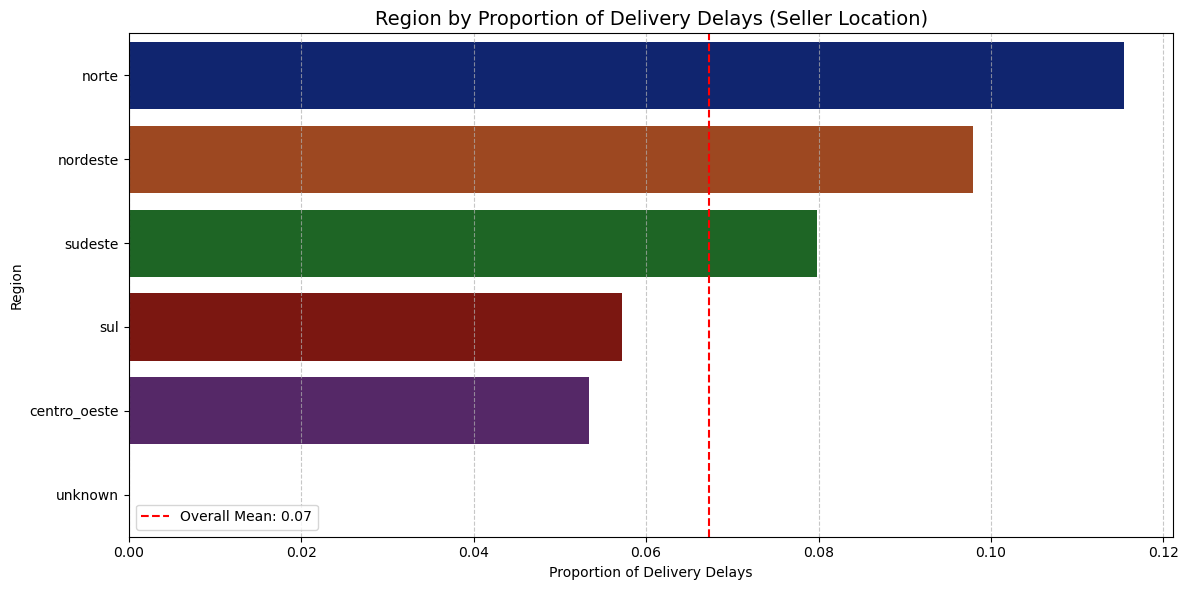

In [ ]:
# Filter only delayed orders (calculate the mean delay rate per region)
delayed_orders_seller_region = df_merged.groupby("seller_region")["is_late"].mean()

# Sort and select the region with the highest delay proportions.
top_region = delayed_orders_seller_region.sort_values(ascending=False)

# Reset index to turn it into a DataFrame
top_region = top_region.reset_index()
top_region.rename(columns={"is_late": "delayed_orders_seller_region"}, inplace=True)

# Calculate the overall average delay rate
overall_mean_delay = delayed_orders_seller_region.mean()

# Plot delay percentage by customer region
plt.figure(figsize=(12,6))
sns.barplot(x='delayed_orders_seller_region', y='seller_region', data = top_region, palette='dark')

# Add a vertical line for the overall mean
plt.axvline(x=overall_mean_delay, color='red', linestyle='--', label=f'Overall Mean: {overall_mean_delay:.2f}')

# Plot settings
plt.title('Region by Proportion of Delivery Delays (Seller Location)', fontsize=14)
plt.xlabel('Proportion of Delivery Delays')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

#### Delivery Delays by seller state

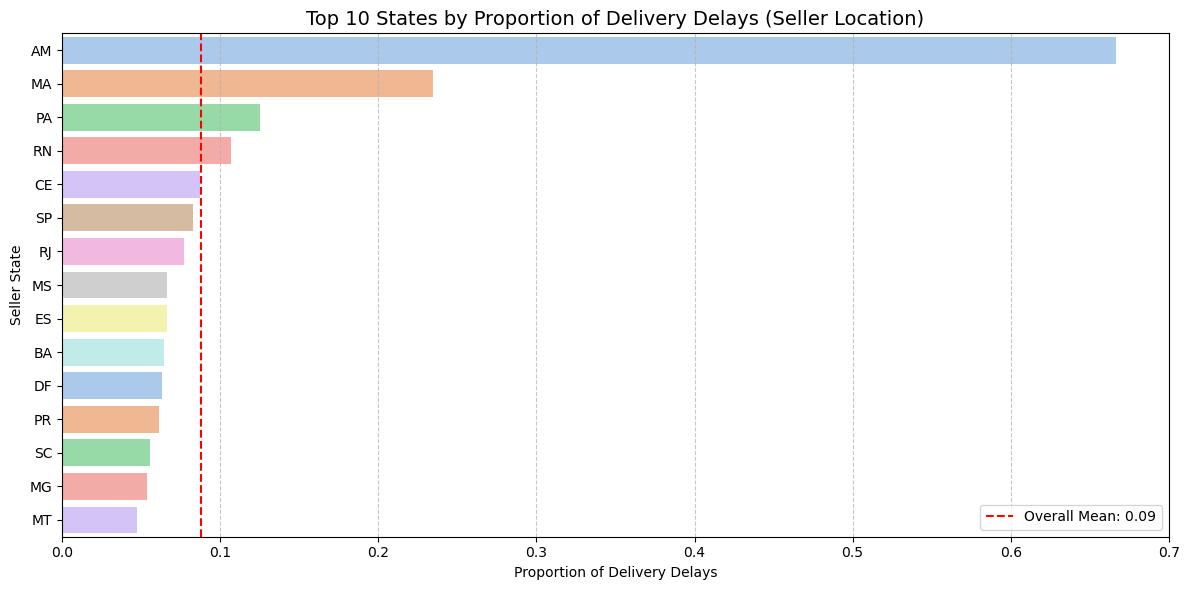

In [108]:
# Filter only delayed orders (calculating the mean delay rate per state)
delayed_orders_seller = df_merged.groupby("seller_state")["is_late"].mean()

# Sort and select the top 15 states with the highest delay proportions 
top_states = delayed_orders_seller.sort_values(ascending=False).head(15)

# Reset index to turn it into a DataFrame
top_states = top_states.reset_index()
top_states.rename(columns={"is_late": "delayed_orders_seller"}, inplace=True)

# Calculate the overall average delay rate
overall_mean_delay = delayed_orders_seller.mean()

# Plot delay percentage by customer state
plt.figure(figsize=(12, 6))
sns.barplot(x='delayed_orders_seller', y='seller_state', data=top_states, palette='pastel')

# Add a vertical line for the overall mean
plt.axvline(x=overall_mean_delay, color='red', linestyle='--', label=f'Overall Mean: {overall_mean_delay:.2f}')

# Plot settings
plt.title('Top 10 States by Proportion of Delivery Delays (Seller Location)', fontsize=14)
plt.xlabel('Proportion of Delivery Delays')
plt.ylabel('Seller State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

#### Delivery Delays by product category

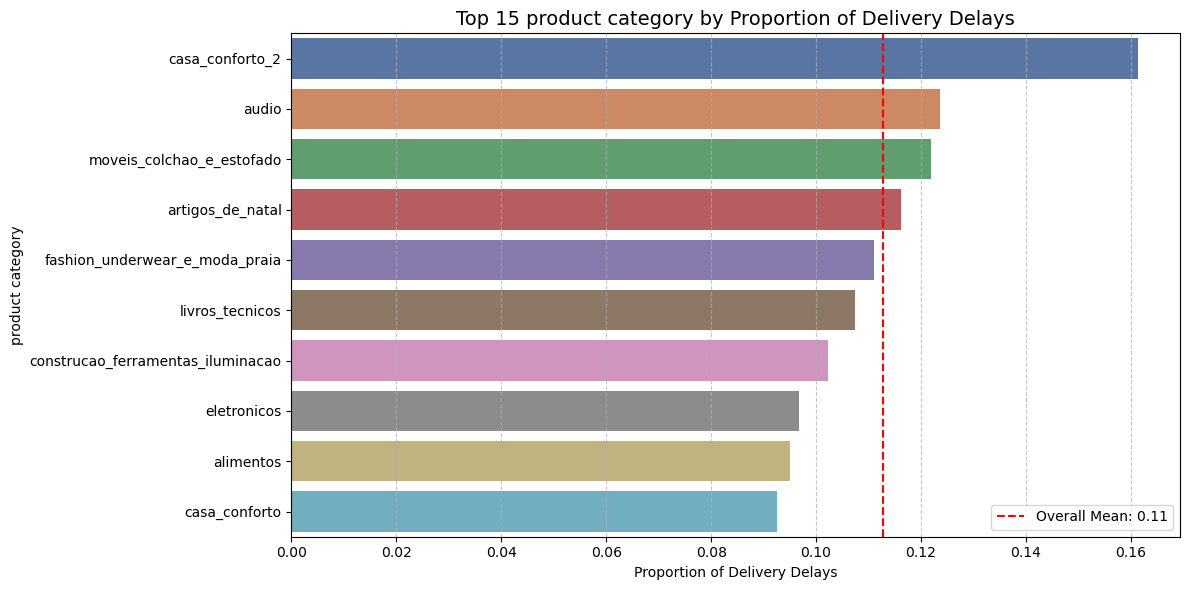

In [113]:
# Filter only delayed orders (calculating the mean delay rate per product category)
delayed_orders_product_category = df_merged.groupby("product_category_name")["is_late"].mean()

# Sort and select the top 15 product category with the highest delay proportions
top_product_category = delayed_orders_product_category.sort_values(ascending=False).head(10)

# Reset index to turn it into a DataFrame
top_product_category = top_product_category.reset_index()
top_product_category.rename(columns= {"is_late": "delayed_orders_product_category"}, inplace=True) 

# Calculate the overall average delay rate
overall_mean_product_category = top_product_category["delayed_orders_product_category"].mean()

# Plot delay percentage by product category
plt.figure(figsize=(12,6))
sns.barplot(x='delayed_orders_product_category', y='product_category_name', data = top_product_category, palette='deep')

# Add a vertical line for the overall mean
plt.axvline(x=overall_mean_product_category, color='red', linestyle='--', label=f'Overall Mean: {overall_mean_product_category:.2f}')

# Plot settings
plt.title('Top 15 product category by Proportion of Delivery Delays', fontsize=14)
plt.xlabel('Proportion of Delivery Delays')
plt.ylabel('product category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()